Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                576       
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
516/516 [==============================] - 2s 3ms/step - loss: 0.5501 - val_loss: 0.4737
Epoch 2/100
516/516 [==============================] - 2s 4ms/step - loss: 0.4328 - val_loss: 0.4169
Epoch 3/100
516/516 [==============================] - 3s 6ms/step - loss: 0.3992 - val_loss: 0.3924
Epoch 4/100
516/516 [==============================] - 5s 9ms/step - loss: 0.3743 - val_loss: 0.3647
Epoch 5/100
516/516 [===========================

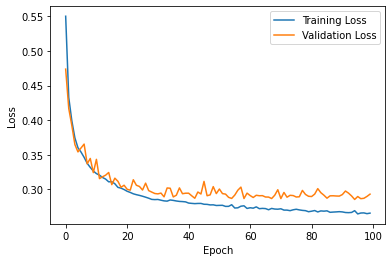

129/129 [==============================] - 0s 2ms/step


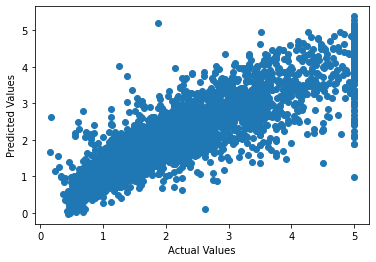

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the Boston Housing dataset
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(boston.data)
y = boston.target.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='sigmoid', input_shape=[X.shape[1]]),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

# Print a summary of the model's topology
model.summary()

# Visualize the model's topology
tf.keras.utils.plot_model(model, show_shapes=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Plot the loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Predict the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
